<a href="https://colab.research.google.com/github/Vishall1221/Neural_network_regression_model/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
insurance_set=pd.get_dummies(insurance)

In [123]:
insurance_set.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [124]:
x=insurance_set.drop('charges',axis=1)
y=insurance_set['charges']

In [125]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [126]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [129]:
len(x_train) , len(x_test)

(1070, 268)

In [130]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [131]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=[x_train.shape[1]]),  # Input shape set to match training data
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])


insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)


early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)


history = insurance_model.fit(
    x_train, y_train,
    epochs=200,
    verbose=0,
    callbacks=[early_stop]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2789.1353 - mae: 2789.1353  


[2751.8544921875, 2751.8544921875]

<Axes: >

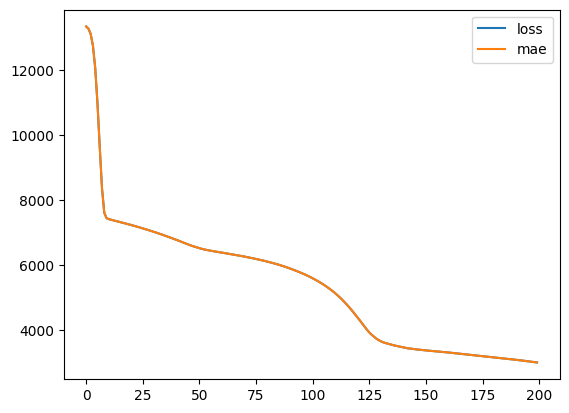

In [133]:
pd.DataFrame(history.history).plot()

In [134]:
insurance_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [135]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [137]:
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

x=insurance.drop('charges',axis=1)
y=insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ct.fit(x_train)

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)



In [138]:
ct.fit(x_train)

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [139]:
x_train_normal[0] , x_test_normal[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]))

In [140]:
x_train_normal.shape , x_test_normal.shape

((1070, 11), (268, 11))

In [141]:
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(50 ,input_shape=[x_train_normal.shape[1]] ,activation='relu'),
    tf.keras.layers.Dense(50 , activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history_2=insurance_model_2.fit(
    x_train_normal,y_train,
    epochs=300,
    verbose=0,
    callbacks=[early_stop]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
insurance_model_2.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1802.4219 - mae: 1802.4219  


[1803.211669921875, 1803.211669921875]

<Axes: >

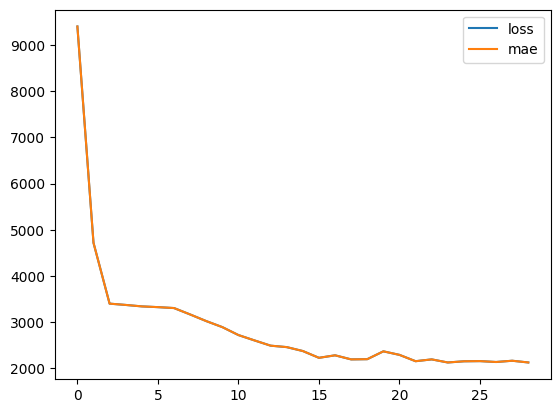

In [143]:
pd.DataFrame(history_2.history).plot()

In [144]:
y_test.shape , x_test.shape

((268,), (268, 6))

In [145]:
insurance_model_2.predict(x_test_normal).squeeze().shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(268,)

In [146]:
y_test.shape

(268,)

In [147]:
pd.DataFrame(insurance_model_2.predict(x_test_normal),y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,0
charges,
9095.06825,9343.933594
5272.17580,5247.934082
29330.98315,29940.093750
9301.89355,9432.885742
33750.29180,26259.216797
...,...
47055.53210,44611.671875
12222.89830,12533.964844
6067.12675,6120.079590
